<a href="https://colab.research.google.com/github/Saudul-12/Association_Rules/blob/main/Association_Rules_Assignment_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Prepare rules for the my_movies.csv data set.**

**Try different values of support and confidence. Observe the change in number of rules for different support,confidence values.**

**Visulize the obtained rules using different plots.**

In [10]:
!pip install mlxtend
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
test = pd.read_csv('my_movies.csv')
test

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
movies = pd.get_dummies(test)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sixth Sense       10 non-null     int64
 1   Gladiator         10 non-null     int64
 2   LOTR1             10 non-null     int64
 3   Harry Potter1     10 non-null     int64
 4   Patriot           10 non-null     int64
 5   LOTR2             10 non-null     int64
 6   Harry Potter2     10 non-null     int64
 7   LOTR              10 non-null     int64
 8   Braveheart        10 non-null     int64
 9   Green Mile        10 non-null     int64
 10  V1_Gladiator      10 non-null     uint8
 11  V1_Harry Potter1  10 non-null     uint8
 12  V1_LOTR1          10 non-null     uint8
 13  V1_Sixth Sense    10 non-null     uint8
 14  V2_Harry Potter2  10 non-null     uint8
 15  V2_LOTR           10 non-null     uint8
 16  V2_LOTR1          10 non-null     uint8
 17  V2_LOTR2          10 non-null     uint

In [7]:
frequent_itemsets = apriori(movies, min_support=0.25, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Sixth Sense, Patriot, V2_Patriot, V3_Sixth Se..."
59,0.4,"(Sixth Sense, V2_Patriot, V3_Sixth Sense, Glad..."
60,0.4,"(Sixth Sense, Patriot, V2_Patriot, V3_Sixth Se..."
61,0.4,"(Patriot, V2_Patriot, V3_Sixth Sense, Gladiato..."


In [8]:
rule1 = association_rules(frequent_itemsets, metric='lift', min_threshold= 1)
rule1.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
404,"(V1_Gladiator, V3_Sixth Sense, Gladiator)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
266,"(Sixth Sense, Patriot)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
508,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, Patriot, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
253,"(Sixth Sense, Patriot)","(V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
444,"(V3_Sixth Sense, Gladiator)","(Sixth Sense, Patriot, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
256,"(V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
257,"(Patriot, V3_Sixth Sense)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
442,"(V3_Sixth Sense, V2_Patriot)","(Sixth Sense, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
440,"(Patriot, V3_Sixth Sense)","(Sixth Sense, Gladiator, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
261,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf


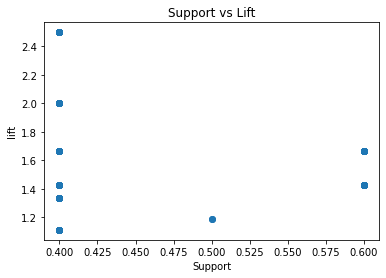

In [14]:
plt.scatter('support','lift',data=rule1)
plt.xlabel('Support')
plt.ylabel("lift")
plt.title('Support vs Lift')
plt.show()

**RULE 2 FOR ANOTHER SUPPORT VALUE and metric as SUPPORT**

In [17]:
frequent_itemsets2 = apriori(movies, min_support= 0.1, use_colnames= True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Sixth Sense, V3_Harry Potter1, V1_Sixth Sense..."
1393,0.1,"(Sixth Sense, V3_Harry Potter1, V1_Sixth Sense..."
1394,0.1,"(Sixth Sense, V3_Harry Potter1, V1_Sixth Sense..."
1395,0.1,"(V3_Harry Potter1, V1_Sixth Sense, LOTR1, V5_L..."


In [18]:
rule2 = association_rules(frequent_itemsets2, metric= 'confidence', min_threshold=1)
rule2.sort_values('confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
37828,"(V2_LOTR1, Harry Potter1, LOTR1, V5_LOTR2)","(V3_Harry Potter1, V4_Green Mile, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
37817,"(LOTR1, Harry Potter1, V1_Sixth Sense, V5_LOTR2)","(V3_Harry Potter1, V4_Green Mile, V2_LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
37818,"(LOTR1, V4_Green Mile, V1_Sixth Sense, V5_LOTR2)","(V3_Harry Potter1, V2_LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
37819,"(V2_LOTR1, LOTR1, V1_Sixth Sense, V5_LOTR2)","(V3_Harry Potter1, V4_Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


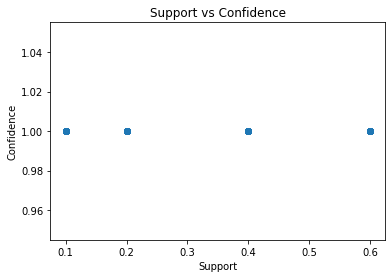

In [20]:
plt.scatter('support','confidence',data=rule2)
plt.xlabel('Support')
plt.ylabel("Confidence")
plt.title('Support vs Confidence')
plt.show()

RULE 3 FOR ANOTHER SUPPORT VALUE

In [22]:
frequent_itemsets3 = apriori(movies, min_support= 0.2, use_colnames= True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Sixth Sense, Patriot, V2_Patriot, V3_Sixth Se..."
77,0.4,"(Sixth Sense, V2_Patriot, V3_Sixth Sense, Glad..."
78,0.4,"(Sixth Sense, Patriot, V2_Patriot, V3_Sixth Se..."
79,0.4,"(Patriot, V2_Patriot, V3_Sixth Sense, Gladiato..."


In [23]:
rule3 = association_rules(frequent_itemsets3, metric= 'lift', min_threshold=1)
rule3.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(V4_Green Mile, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf


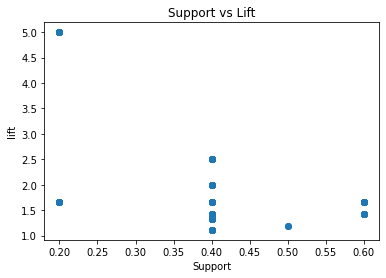

In [24]:
plt.scatter('support','lift',data=rule3)
plt.xlabel('Support')
plt.ylabel("lift")
plt.title('Support vs Lift')
plt.show()